In [20]:
import io
#import pydotplus
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
#from IPython.display import Image 

import matplotlib.pyplot as plt
%matplotlib inline

## MTA-Weather Regression

In [21]:
!pwd
!cd ..
pwd = !pwd
pwd = pwd[0][:-6]
path = pwd + "1_DATA"

/Users/JackTsai/Google Drive/ADS Project/3_Code


In [63]:
df = pd.read_csv(path +'/final_dataset.csv',index_col=0)
df = df.dropna()
df.head(30)

,STATION,Date,TIMEINT,ENTRIES,Temperature,Humidity,Heavy Rain,Heavy Snow,Light Freezing Fog,Light Freezing Rain,...,Light Snow,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Haze,Fog,Clear
0,1 AV,2016-01-01,1,1407774726,41.275,53.5,0.0,0.0,0.0,0.0,...,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
1,1 AV,2016-01-01,1,1407774726,34.000,48.5,0.0,0.0,0.0,0.0,...,0.0,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.75
2,1 AV,2016-01-01,1,1407774726,35.775,52.5,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.00
3,1 AV,2016-01-01,1,1407774726,35.275,55.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.00
4,103 ST,2016-01-01,1,124276833,41.275,53.5,0.0,0.0,0.0,0.0,...,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
5,103 ST,2016-01-01,1,124276833,34.000,48.5,0.0,0.0,0.0,0.0,...,0.0,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.75
6,103 ST,2016-01-01,1,124276833,35.775,52.5,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.00
7,103 ST,2016-01-01,1,124276833,35.275,55.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.75,0.25,0.0,0.0,0.0,0.0,0.0,0.00
8,103 ST-CORONA,2016-01-01,1,61101554,41.275,53.5,0.0,0.0,0.0,0.0,...,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
9,103 ST-CORONA,2016-01-01,1,61101554,34.000,48.5,0.0,0.0,0.0,0.0,...,0.0,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.75


In [65]:
df.TIMEINT.unique()

array([1, 2, 3, 4, 5, 6])

In [38]:
df.columns

Index(['STATION', 'Date', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity',
       'Heavy Rain', 'Heavy Snow', 'Light Freezing Fog', 'Light Freezing Rain',
       'Light Rain', 'Light Snow', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy', 'Rain', 'Scattered Clouds', 'Snow', 'Haze', 'Fog',
       'Clear'],
      dtype='object')

In [40]:
# Get all weather condition columns
conditions = df.drop(['Date', 'STATION', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity'],axis=1).columns
conditions

Index(['Heavy Rain', 'Heavy Snow', 'Light Freezing Fog', 'Light Freezing Rain',
       'Light Rain', 'Light Snow', 'Mostly Cloudy', 'Overcast',
       'Partly Cloudy', 'Rain', 'Scattered Clouds', 'Snow', 'Haze', 'Fog',
       'Clear'],
      dtype='object')

In [41]:
# Get the total count for each weather condition
df[conditions].sum(axis=0).sort_values(ascending=False)

Clear                  389677.681415
Overcast               155932.266694
Mostly Cloudy           53950.601414
Partly Cloudy           44734.129899
Scattered Clouds        29543.705292
Light Rain              27458.274922
Haze                    15816.566129
Rain                     5110.570286
Light Snow               4368.866027
Heavy Rain               2097.418917
Snow                     1845.190322
Heavy Snow                518.222321
Light Freezing Rain       269.973333
Fog                       108.857143
Light Freezing Fog         83.595506
dtype: float64

In [43]:
# Merge the weather conditions
df['Rain'] += df['Heavy Rain'] + df['Light Rain'] + df['Light Freezing Rain']
df['Snow'] += df['Heavy Snow'] + df['Light Snow']
df['Cloudy'] = (df['Partly Cloudy'] + df['Scattered Clouds'] + df['Mostly Cloudy']
                + df['Overcast'] + df['Fog'] + df['Haze'] + df['Light Freezing Fog'])

# Get rid of columns that we don't want
df = df.drop([c for c in conditions if c not in ['Rain', 'Snow', 'Cloudy', 'Clear']],axis=1)
df.head()

,STATION,Date,TIMEINT,ENTRIES,Temperature,Humidity,Rain,Snow,Clear,Cloudy
0,1 AV,2016-01-01,1,1407774726,41.275,53.5,0.0,0.0,0.00,1.00
1,1 AV,2016-01-01,1,1407774726,34.000,48.5,0.0,0.0,0.75,0.25
2,1 AV,2016-01-01,1,1407774726,35.775,52.5,0.0,0.0,1.00,0.00
3,1 AV,2016-01-01,1,1407774726,35.275,55.0,0.0,0.0,0.00,1.00
4,103 ST,2016-01-01,1,124276833,41.275,53.5,0.0,0.0,0.00,1.00


In [46]:
# Print  total number of stations
# df['STATION'].unique(), len(df['STATION'].unique())

In [47]:
df.columns

Index(['STATION', 'Date', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity',
       'Rain', 'Snow', 'Clear', 'Cloudy'],
      dtype='object')

In [52]:
df_reg = df[['STATION', 'ENTRIES', 'Temperature', 'Humidity','Rain', 'Snow', 'Clear', 'Cloudy']].groupby("STATION").mean()
df_reg.reset_index(inplace =True)
df_reg.head()

,STATION,ENTRIES,Temperature,Humidity,Rain,Snow,Clear,Cloudy
0,1 AV,1.474152e+09,57.142107,58.622862,0.083810,0.015551,0.516831,0.392888
1,103 ST,1.579193e+08,56.959050,58.276542,0.088313,0.014857,0.506192,0.400439
2,103 ST-CORONA,6.329764e+07,57.142107,58.622862,0.083810,0.015551,0.516831,0.392888
3,104 ST,3.888755e+09,57.142107,58.622862,0.083810,0.015551,0.516831,0.392888
4,110 ST,2.728327e+07,57.142107,58.622862,0.083810,0.015551,0.516831,0.392888


In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [57]:
reg1 = smf.ols('ENTRIES ~ Temperature + Humidity + Rain + Snow + Clear + Cloudy', data = df_reg).fit()

In [59]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ENTRIES   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     3.365
Date:                Mon, 04 Dec 2017   Prob (F-statistic):            0.00306
Time:                        12:47:56   Log-Likelihood:                -8263.1
No. Observations:                 373   AIC:                         1.654e+04
Df Residuals:                     366   BIC:                         1.657e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.142e+11   9.24e+10      2.319      0.021    3.26e+10    3.96e+11
Temperature -1.946e+09   8.21e+08     -2.370      0.018   -3.56e+09   -3.32e+08
Humidity     9.549e+08   1.24e+09      0.771      0.441   -1.48e+09    3.39e+09
Rain        -1.782e+11   1.21e+11     -1.471      0.142   -4.17e+11    6.01e+10
Snow        -6.776e+11   2.65e+11     -2.560      0.011    -1.2e+12   -1.57e+11
Clear       -1.292e+11   8.44e+10     -1.530      0.127   -2.95e+11    3.68e+10
Cloudy      -1.686e+11   1.04e+11     -1.625      0.105   -3.73e+11    3.54e+10
==============================================================================
Omnibus:                      335.135   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6622.728
Skew:                           3.891   Prob(JB):                         0.00
Kurtosis:                      22.119   Cond. No.                     4.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
reg2 = smf.ols('ENTRIES ~ Temperature  + Rain + Snow + Clear + Cloudy', data = df_reg).fit()

In [61]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ENTRIES   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.923
Date:                Mon, 04 Dec 2017   Prob (F-statistic):            0.00177
Time:                        12:48:18   Log-Likelihood:                -8263.4
No. Observations:                 373   AIC:                         1.654e+04
Df Residuals:                     367   BIC:                         1.656e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.159e+11   9.23e+10      2.339      0.020    3.44e+10    3.97e+11
Temperature -1.441e+09   4.95e+08     -2.911      0.004   -2.41e+09   -4.68e+08
Rain        -2.141e+11   1.12e+11     -1.915      0.056   -4.34e+11    5.75e+09
Snow         -6.31e+11   2.57e+11     -2.450      0.015   -1.14e+12   -1.25e+11
Clear       -1.028e+11   7.71e+10     -1.333      0.183   -2.55e+11    4.89e+10
Cloudy      -1.328e+11   9.27e+10     -1.432      0.153   -3.15e+11    4.95e+10
==============================================================================
Omnibus:                      335.441   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6631.899
Skew:                           3.897   Prob(JB):                         0.00
Kurtosis:                      22.130   Cond. No.                     2.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Extract features and result
# df = df[:100]
X = df.drop(columns=['Date', 'STATION', 'TIMEINT', 'ENTRIES'])
y = df['ENTRIES']
print(X.shape)
print(y.head())
X.head()

(759094, 6)
0    1407774726
1    1407774726
2    1407774726
3    1407774726
4     124276833
Name: ENTRIES, dtype: int64


,Temperature,Humidity,Rain,Snow,Clear,Cloudy
0,41.275,53.5,0.0,0.0,0.00,1.00
1,34.000,48.5,0.0,0.0,0.75,0.25
2,35.775,52.5,0.0,0.0,1.00,0.00
3,35.275,55.0,0.0,0.0,0.00,1.00
4,41.275,53.5,0.0,0.0,0.00,1.00


In [97]:
# Train model
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

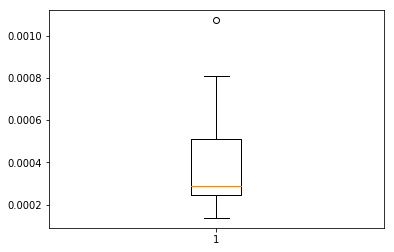

In [101]:
cv = cross_val_score(dtree, X, y, cv=KFold(n_splits=10, random_state=123456))
plt.boxplot([-cv]);

In [95]:
# Print out feature importance
list(sorted(zip(X.columns, dtree.feature_importances_), key=lambda a: -a[1]))

[('Temperature', 0.59234530904773275),
 ('Humidity', 0.28573698217165699),
 ('Cloudy', 0.089961505952384349),
 ('Snow', 0.031956202828225852),
 ('Rain', 0.0),
 ('Clear', 0.0)]

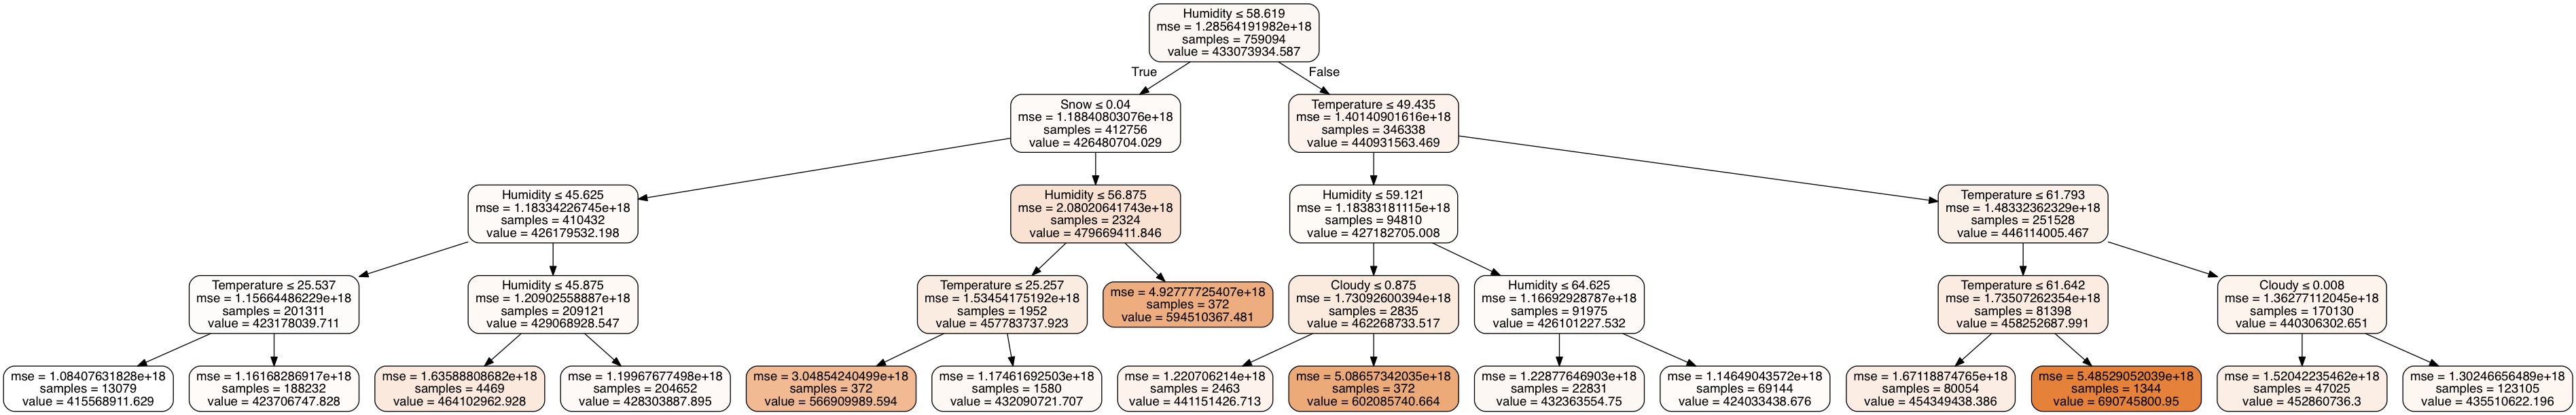

In [96]:
# Draw decision tree graph
dot_data = io.StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Define list of models to test
models = [
    # Replace these with desired models...
    ('lin SVM', SVC(kernel="linear", C=0.025)),
    ('rbf SVM', SVC(gamma=2, C=1)),
    ('LogR', LogisticRegression()),
    ('MLP', MLPClassifier(alpha=1)),
    ('NB', GaussianNB()),
    ('KNN', KNeighborsClassifier(5)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('DTree', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ('Ada', AdaBoostClassifier())
]
names = [n for n, m in models]

In [ ]:
# View cross validation results - accuracy ean and standard deviation
results = []
for name, model in models:
    t = time.time()
    cv_result = cross_val_score(model, X, Y, cv=KFold(n_splits=10, random_state=seed))
    results.append(cv_result)
    print('{}: {:.4f} (std: {:.4f}) took {:.2f}s'.format(name, cv_result.mean(), cv_result.std(), time.time() - t))

# boxplot algorithm comparison
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(names))+1, names)
plt.savefig('results/clsf-comparison-{}.png'.format(len(models)));